# NumPy 소개 

*이 "Numpy 소개" 노트북은 [Sebastian Raschka](https://sebastianraschka.com)의  [GitHub](https://github.com/rasbt/deep-learning-book/blob/master/code/appendix_f_numpy-intro/appendix_f_numpy-intro.ipynb)에 기반*

- [Scientific Computing in NumPy](#Scientific-Computing-in-NumPy)
- [N-dimensional Arrays](#N-dimensional-Arrays)
- [Array Construction Routines](#Array-Construction-Routines)
- [Array Indexing](#Array-Indexing)
- [Array Math and Universal Functions](#Array-Math-and-Universal-Functions)
- [Broadcasting](#Broadcasting)
- [Advanced Indexing -- Memory Views and Copies](#Advanced-Indexing----Memory-Views-and-Copies)
- [Comparison Operators and Masks](#Comparison-Operators-and-Masks)
- [Random Number Generators](#Random-Number-Generators)
- [Reshaping Arrays](#Reshaping-Arrays)
- [Linear Algebra with NumPy Arrays](#Linear-Algebra-with-NumPy-Arrays)
- [Set Operations](#Set-Operations)
- [Serializing NumPy Arrays](#Serializing-NumPy-Arrays)
- [Conclusion](#Conclusion)

## Scientific Computing in NumPy

This appendix offers a quick tour of the NumPy library for working with multi-dimensional arrays in Python. NumPy (short for Numerical Python) was created by Travis Oliphant in 2005, by merging Numarray into Numeric. Since then, the open source NumPy library has evolved into an essential library for scientific computing in Python and has become a building block of many other scientific libraries, such as SciPy, scikit-learn, pandas, and others.
What makes NumPy so particularly attractive to the scientific community is that it provides a convenient Python interface for working with multi-dimensional array data structures efficiently; the NumPy array data structure is also called `ndarray`, which is short for *n*-dimensional array. 

In addition to being mostly implemented in C and using Python as glue, the main reason why NumPy is so efficient for numerical computations is that NumPy arrays use contiguous blocks of memory that can be efficiently cached by the CPU. In contrast, Python lists are arrays of pointers to objects in random locations in memory, which cannot be easily cached and come with a more expensive memory-look-up. However, the computational efficiency and low-memory footprint come at a cost: NumPy arrays have a fixed size and are homogenous, which means that all elements must have the same type. Homogenous `ndarray` objects have the advantage that NumPy can carry out operations using efficient C loops and avoid expensive type checks and other overheads of the Python API. While adding and removing elements from the end of a Python list is very efficient, altering the size of a NumPy array is very expensive since it requires to create a new array and carry over the contents of the old array that we want to expand or shrink. 

Besides being more efficient for numerical computations than native Python code, NumPy can also be more elegant and readable due to vectorized operations and broadcasting, which are features that we will explore in this appendix. While this appendix should be sufficient to follow the code examples in this book if you are new to NumPy, there are many advanced NumPy topics that are beyond the scope of this book. 
<br>
<br>
Numpy 공부를 위해 아래 자료들을 참고 바랍니다.  :

- Rougier, N.P., 2016. [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy/). [Rougier의 Github](https://github.com/rougier/from-python-to-numpy), [100 Numpy 예제](https://github.com/rougier/numpy-100). 매우 좋은 Numpy 자료들이 있음
- [Jake VanderPlas의 판타스틱한 공부거리](https://jakevdp.github.io/PythonDataScienceHandbook/) (Numpy, Pandas, Matplotlib, 머신러닝)와 그 [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook) 
- Oliphant, T.E., 2015. A Guide to NumPy: 2nd Edition. USA: Travis Oliphant, independent publishing. : Numpy 발명자 
- Varoquaux, G., Gouillart, E., Vahtras, O., Haenel, V., Rougier, N.P., Gommers, R., Pedregosa, F., Jędrzejewski-Szmek, Z., Virtanen, P., Combelles, C. and Pinte, D., 2015. [Scipy Lecture Notes](http://www.scipy-lectures.org/intro/numpy/index.html).
- [The official NumPy documentation](https://docs.scipy.org/doc/numpy/reference/index.html)
  - [Quickstart tutorial](https://docs.scipy.org/doc/numpy-1.14.2/user/quickstart.html) 부터 시작을 추천 
- [스탠포드 cs231n Numpy 소개](http://cs231n.github.io/python-numpy-tutorial/) & [번역](http://taewan.kim/post/numpy_cheat_sheet/)
- [짧은 Numpy 소개](https://engineering.ucsb.edu/~shell/che210d/numpy.pdf)

## ndarray : Numpy n-dimensional 배열(Array).  ndarray의 원소들은 모두 같은 데이터 타입이어야 함   
<br>
<br>

![ndarray](https://www.safaribooksonline.com/library/view/elegant-scipy/9781491922927/assets/elsp_0105.png)    
<br>
<br>
NumPy is built around [`ndarrays`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) objects, which are high-performance multi-dimensional array data structures. Intuitively, we can think of a one-dimensional NumPy array as a data structure to represent a vector of elements -- you may think of it as a fixed-size Python list where all elements share the same type. Similarly, we can think of a two-dimensional array as a data structure to represent a matrix or a Python list of lists. While NumPy arrays can have up to 32 dimensions if it was compiled without alterations to the source code, we will focus on lower-dimensional arrays for the purpose of illustration in this introduction.

Now, let us get started with NumPy by calling the `array` function to create a two-dimensional NumPy array, consisting of two rows and three columns, from a list of lists:

In [1]:
import numpy as np

lst = [[1, 2, 3], [4, 5, 6]]   # list로부터 ndarray 생성 
ary1d = np.array(lst)
ary1d       # 2차원 array

array([[1, 2, 3],
       [4, 5, 6]])

![](images/numpy-intro/array_1.png)

By default, NumPy infers the type of the array upon construction. Since we passed Python integers to the array, the `ndarray` object `ary1d` should be of type `int64` on a 64-bit machine, which we can confirm by accessing the `dtype` attribute:

In [2]:
ary1d.dtype

dtype('int32')

If we want to construct NumPy arrays of different types, we can pass an argument to the `dtype` parameter of the `array` function, for example `np.int32` to create 32-bit arrays. For a full list of supported data types, please refer to the official [NumPy documentation](https://docs.scipy.org/doc/numpy/user/basics.types.html). Once an array has been constructed, we can downcast or recast its type via the `astype` method as shown in the following example:

In [3]:
float32_ary = ary1d.astype(np.float32)
float32_ary

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]], dtype=float32)

In [4]:
float32_ary.dtype

dtype('float32')

In the following sections we will cover many more aspects of NumPy arrays; however, to conclude this basic introduction to the `ndarray` object, let us take a look at some of its handy attributes.

For instance, the **`itemsize`** attribute returns the *size of a single array element in bytes*:

In [5]:
ary2d = np.array([[1, 2, 3], 
                  [4, 5, 6]], dtype='int64')
ary2d.itemsize   # int64는 64bit 정수.  즉 8 byte

8

The code snippet above returned `8`, which means that each element in the array (remember that `ndarray`s are homogeneous) takes up 8 bytes in memory. This result makes sense since the array `ary2d` has type `int64` (64-bit integer), which we determined earlier, and 8 bits equals 1 byte. (Note that `'int64'` is just a shorthand for `np.int64`.)

To return the number of elements in an array, we can use the `size` attribute, as shown below:

In [6]:
ary2d.size

6

And the number of dimensions of our array (Intuitively, you may think of *dimensions* as the *rank* of a tensor) can be obtained via the `ndim` attribute:

In [7]:
ary2d.ndim

2

If we are interested in the number of elements along each array dimension (in the context of NumPy arrays, we may also refer to them as *axes*), we can access the `shape` attribute as shown below:

In [8]:
ary2d.shape   # ndarray의 모양을 볼 때 사용 

(2, 3)

The `shape` is always a tuple; in the code example above, the two-dimensional `ary` object has two *rows* and *three* columns, `(2, 3)`, if we think of it as a matrix representation.

Similarly, the `shape` of the one-dimensional array only contains a single value:

In [9]:
np.array([1, 2, 3]).shape    # ndarray가 1 차원일 때.  잘 기억 바람

(3,)

Instead of passing lists or tuples to the `array` function, we can also provide a single float or integer, which will construct a zero-dimensional array (for instance, a representation of a scalar):

In [10]:
scalar = np.array(5)
scalar

array(5)

In [11]:
scalar.ndim

0

In [12]:
scalar.shape

()

#### 다음을 주의하세요

In [13]:
ta = np.array([list('abcd'), list('1234')])    # 입력된 두 리스트의 길이가 같음 
ta

array([['a', 'b', 'c', 'd'],
       ['1', '2', '3', '4']], 
      dtype='<U1')

In [14]:
ta.shape     # 이 경우는 2x4 2 차원 배열 

(2, 4)

In [15]:
ta = np.array([list('abcd'), list('12345')])     # 입력된 두 리스트의 길이가 다름 
ta

array([['a', 'b', 'c', 'd'], ['1', '2', '3', '4', '5']], dtype=object)

In [16]:
ta.shape   # 이 경우는 1차원 배열 

(2,)

In [17]:
ta.ndim

1

## Array Construction Routines

In the previous section, we used the `array` function to construct NumPy arrays from Python objects that are sequences or nested sequences -- lists, tuples, nested lists, iterables, and so forth. While `array` is often our go-to function for creating `ndarray` objects, NumPy implements a variety of functions for constructing arrays that may come in handy in different contexts. In this section, we will take a quick peek at those that we use most commonly -- you can find a  more comprehensive list in the [official documentation](https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html).

The `array` function works with most iterables in Python, including lists, tuples, and `range` objects; however, `array` does not support generator expression. If we want parse generators directly, however, we can use the `fromiter` function as demonstrated below: 

In [18]:
def generator():
    for i in range(10):
        if i % 2:
            yield i

gen = generator()
np.fromiter(gen, dtype=int)   # np.array(list(gen)) 도 가능 

array([1, 3, 5, 7, 9])

In [19]:
# using 'comprehensions' the following generator expression is equivalent to
# the `generator` above

generator_expression = (i for i in range(10) if i % 2)
np.fromiter(generator_expression, dtype=int)  

array([1, 3, 5, 7, 9])

Next, we will take at two functions that let us create `ndarray`s of consisting of either ones and zeros by only specifying the elements along each axes 

In [20]:
np.ones((3, 4))   # 3x4 행렬.  모든 원소들을 1로 

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [21]:
np.zeros((3, 3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

Creating arrays of ones or zeros can also be useful as placeholder arrays, in cases where we do not want to use the initial values for computations but want to fill it with other values right away. If we do not need the initial values (for instance, `'0.'` or `'1.'`), there is also `numpy.empty`, which follows the same syntax as `numpy.ones` and `np.zeros`. However, instead of filling the array with a particular value, the `empty` function creates the array with non-sensical values from memory. We can think of `zeros` as a function that creates the array via `empty` and then sets all its values to `0.` -- in practice, a difference in speed is not noticeable, though.  

NumPy also comes with functions to create identity matrices and diagonal matrices as `ndarrays` that can be useful in the context of linear algebra -- a topic that we will explore later in this appendix. 

In [22]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [23]:
np.eye(3,5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.]])

In [24]:
np.diag((3, 4, 5))

array([[3, 0, 0],
       [0, 4, 0],
       [0, 0, 5]])

#### arange 함수
Lastly, I want to mention two very useful functions for creating sequences of numbers within a specified range, namely, `arange` and `linspace`. NumPy's `arange` function follows the same syntax as Python's `range` objects: If two arguments are provided, the first argument represents the start value and the second value defines the stop value of a half-open interval:

In [25]:
np.arange(4., 10.)   # 매우 자주 사용하게 됨 

array([ 4.,  5.,  6.,  7.,  8.,  9.])

Notice that `arange` also performs type inference similar to the `array` function. If we only provide a single function argument, the range object treats this number as the endpoint of the interval and starts at 0:

In [26]:
np.arange(5)

array([0, 1, 2, 3, 4])

Similar to Python's `range`, a third argument can be provided to define the *step* (the default step size is 1). For example, we can obtain an array of all uneven values between one and ten as follows:

In [27]:
np.arange(1., 11., 2)

array([ 1.,  3.,  5.,  7.,  9.])

In [28]:
np.arange(12, 2, -2)   # 12에서 시작해 2씩 감소해가며.  

array([12, 10,  8,  6,  4])

The `linspace` function is especially useful if we want to create a particular number of evenly spaced values in a specified half-open interval:

In [29]:
np.linspace(0., 1., num=5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

## Array Indexing : Python에서의 indexing, slicing과 흡사

In this section, we will go over the basics of retrieving NumPy array elements via different indexing methods. Simple NumPy indexing and slicing works similar to Python lists, which we will demonstrate in the following code snippet, where we retrieve the first element of a one-dimensional array:

In [30]:
ary = np.array([1, 2, 3])
ary[0]

1

Also, the same Python semantics apply to slicing operations. The following example shows how to fetch the first two elements in `ary`:

In [31]:
ary[:2] # equivalent to ary[0:2]

array([1, 2])

If we work with arrays that have more than one dimension or axis, we separate our indexing or slicing operations by commas as shown in the series of examples below:

In [32]:
ary = np.array([[1, 2, 3],
                [4, 5, 6]])

ary[0, 0] # upper left

1

In [33]:
ary[-1, -1] # lower right

6

In [34]:
ary[0, 1] # first row, second column

2

In [35]:
ary[0] # entire first row

array([1, 2, 3])

In [36]:
ary[:, 0] # entire first column

array([1, 4])

In [37]:
ary[:, :2] # first two columns

array([[1, 2],
       [4, 5]])

In [38]:
ary[0, 0]

1

In [39]:
ary[1:, 1:]

array([[5, 6]])

## Array Math and Universal Functions : 벡터 연산 

In the previous sections, you learned how to create NumPy arrays and how to access different elements in an array. It is about time that we introduce one of the core features of NumPy that makes working with `ndarray` so efficient and convenient: vectorization. While we typically use for-loops if we want to perform arithmetic operations on sequence-like objects, NumPy provides vectorized wrappers for performing element-wise operations implicitly via so-called *ufuncs* -- short for universal functions.

As of this writing, there are more than 60 ufuncs available in NumPy; ufuncs are implemented in compiled C code and very fast and efficient compared to vanilla Python. In this section, we will take a look at the most commonly used ufuncs, and I recommend you to check out the [official documentation](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs) for a complete list.

To provide an example of a simple ufunc for element-wise addition, consider the following example, where we add a scalar (here: 1) to each element in a nested Python list:

In [40]:
lst = [[1, 2, 3], [4, 5, 6]]

# loop를 사용해 모든 원소들에게 1을 더하려면,
for row_idx, row_val in enumerate(lst):
    for col_idx, col_val in enumerate(row_val):
        lst[row_idx][col_idx] += 1
lst

[[2, 3, 4], [5, 6, 7]]

This for-loop approach is very verbose, and we could achieve the same goal more elegantly using list comprehensions:

In [41]:
lst = [[1, 2, 3], [4, 5, 6]]
[[cell + 1 for cell in row] for row in lst]   # list comprehension을 써서 

[[2, 3, 4], [5, 6, 7]]

We can accomplish the same using NumPy's ufunc for element-wise scalar addition as shown below:

In [42]:
ary = np.array([[1, 2, 3], [4, 5, 6]])
ary = np.add(ary, 1)
ary

array([[2, 3, 4],
       [5, 6, 7]])

The ufuncs for basic arithmetic operations are `add`, `subtract`, `divide`, `multiply`, and `exp` (exponential). 
#### However, NumPy uses operator overloading so that we can use mathematical operators (`+`, `-`, `/`, `*`, and `**`) directly:

In [43]:
ary + 1

array([[3, 4, 5],
       [6, 7, 8]])

In [44]:
ary**2

array([[ 4,  9, 16],
       [25, 36, 49]])

Above, we have seen examples of *binary* ufuncs, which are ufuncs that take two arguments as an input. In addition, NumPy implements several useful *unary* ufuncs, such as `log` (natural logarithm), `log10` (base-10 logarithm), and `sqrt` (square root).

Often, we want to compute the sum or product of array element along a given axis. For this purpose, we can use a ufunc's `reduce` operation. By default, `reduce` applies an operation along the first axis (`axis=0`). In the case of a two-dimensional array, we can think of the first axis as the rows of a matrix. Thus, adding up elements along rows yields the column sums of that matrix as shown below:

In [45]:
ary = np.array([[1, 2, 3], 
                [4, 5, 6]])

np.add.reduce(ary) # column sumns

array([5, 7, 9])

To compute the row sums of the array above, we can specify `axis=1`:

In [46]:
np.add.reduce(ary, axis=1) # row sums

array([ 6, 15])

While it can be more intuitive to use `reduce` as a more general operation, NumPy also provides shorthands for specific operations such as `product` and `sum`. For example, `sum(axis=0)` is equivalent to `add.reduce`:

In [47]:
ary.sum(axis=0) # column sums

array([5, 7, 9])

![](images/numpy-intro/ufunc.png)

In [48]:
np.mean(ary, axis=1)    #  ary.mean(axis=1) 와 같음 

array([ 2.,  5.])

As a word of caution, keep in mind that `product` and `sum` both compute the product or sum of the entire array if we do not specify an axis:

In [49]:
ary.sum()

21

Other useful unary ufuncs are:
    
- mean (computes arithmetic average)
- std (computes the standard deviation)
- var (computes variance)
- np.sort (sorts an array)
- np.argsort (returns indices that would sort an array)
- np.min (returns the minimum value of an array)
- np.max (returns the maximum value of an array)
- np.argmin (returns the index of the minimum value)
- np.argmax (returns the index of the maximum value)
- array_equal (checks if two arrays have the same shape and elements)

## Broadcasting

A topic we glanced over in the previous section is broadcasting. Broadcasting allows us to perform vectorized operations between two arrays even if their dimensions do not match by creating implicit multidimensional grids. You already learned about ufuncs in the previous section where we performed element-wise addition between a scalar and a multidimensional array, which is just one example of broadcasting. 


![broadcasting](https://github.com/rasbt/deep-learning-book/blob/master/code/appendix_f_numpy-intro/images/numpy-intro/broadcasting-1.png?raw=true)

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the **trailing dimensions, and works its way forward.** Two dimensions are compatible when

1. they are equal, or
2. one of them is 1

[Broadcasting 규칙](https://docs.scipy.org/doc/numpy-1.14.2/user/basics.broadcasting.html)   
[참고](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html)

In [50]:
ary1 = np.array([1, 2, 3])
ary2 = np.array([4, 5, 6])

ary1 + ary2

array([5, 7, 9])

In contrast to what we are used from linear algebra, we can also add arrays of different shapes. In the example above, we will add a one-dimensional to a two-dimensional array, where NumPy creates an implicit multidimensional grid from the one-dimensional array `ary1`:

In [51]:
ary3 = np.array([[4, 5, 6], 
                 [7, 8, 9]])

ary3 + ary1 

array([[ 5,  7,  9],
       [ 8, 10, 12]])

Keep in mind though that the number of elements along the explicit axes and the implicit grid have to match so that NumPy can perform a sensical operation. For instance, the following example should raise a `ValueError`, because NumPy attempts to add the elements from the first axis of the left array (2 elements) to the first axis of the right array (3 elements):

In [52]:
try: 
    ary3 + np.array([1, 2])
except ValueError as e:
    print('ValueError:', e)

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 


So, if we want to add the 2-element array to the columns in `ary3`, the 2-element array must have two elements along its *first* axis as well:

In [53]:
print(np.array([[1], [2]]))
np.array([[1], [2]]).shape

[[1]
 [2]]


(2, 1)

In [54]:
ary3 + np.array([[1], [2]])

array([[ 5,  6,  7],
       [ 9, 10, 11]])

In [55]:
np.array([[1], [2]]) + ary3

array([[ 5,  6,  7],
       [ 9, 10, 11]])

## Advanced Indexing -- Memory Views and Copies

Numpy는 View (referencing)를 널리 사용 :

In the previous sections, we have used basic indexing and slicing routines. It is important to note that ***basic integer-based indexing and slicing create so-called *views* of NumPy arrays in memory***. Working with views can be highly desirable since it avoids making unnecessary copies of arrays to save memory resources. To illustrate the concept of memory views, let us walk through a simple example where we access the first row in an array, assign it to a variable, and modify that variable:

카피가 아님: When operating and manipulating arrays, their data is sometimes copied into a new array and sometimes not

In [56]:
a = np.arange(12)
print(a)
b = a            # no new object is created
b is a           # a and b are two names for the same ndarray object

[ 0  1  2  3  4  5  6  7  8  9 10 11]


True

In [57]:
b.shape = 3,4    # changes the shape of a
print(a.shape)
a

(3, 4)


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

**[상기] Python passes mutable objects as references, so function calls make no copy**

In [58]:
def f(x):
    print(id(x))

print(id(a))                           # id is a unique identifier of an object
f(a)

107893184
107893184


In [59]:
ary = np.array([[1, 2, 3],
                [4, 5, 6]])

first_row = ary[0]   # view 
first_row += 99
ary

array([[100, 101, 102],
       [  4,   5,   6]])

As we can see in the example above, changing the value of `first_row` also affected the original array. The reason for this is that `ary[0]` created a view of the first row in `ary`, and its elements were then incremented by 99. The same concept applies to slicing operations:

In [60]:
ary = np.array([[1, 2, 3],
                [4, 5, 6]])

first_row = ary[:1]
first_row += 99
ary

array([[100, 101, 102],
       [  4,   5,   6]])

In [61]:
ary = np.array([[1, 2, 3],
                [4, 5, 6]])

center_col = ary[:, 1]
center_col += 99
ary

array([[  1, 101,   3],
       [  4, 104,   6]])

**If we are working with NumPy arrays, it is always important to be aware that slicing creates views** -- sometimes it is desirable since it can speed up our code by avoiding to create unnecessary copies in memory. 

-----------------
그렇지만, ndarray를 카피해서 갖고 올 필요가 있을 때도 많다; we can do this via the `copy` method as shown below:

In [62]:
second_row = ary[1].copy()
second_row += 99
ary

array([[  1, 101,   3],
       [  4, 104,   6]])

#### Fancy Indexing - 팬시 인덱싱은 항상 copy를 갖고 옴 
In addition to basic single-integer indexing and slicing operations, NumPy supports advanced indexing routines called *fancy* indexing. Via fancy indexing, we can use tuple or list objects of ***non-contiguous integer indices(비연속적인 indexing) *** to return desired array elements. Since fancy indexing can be performed with non-contiguous sequences, it cannot return a view -- a contiguous slice from memory. Thus, fancy indexing always returns a copy of an array -- it is important to keep that in mind. The following code snippets show some fancy indexing examples:

In [63]:
ary = np.array([[1, 2, 3],
                [4, 5, 6]])

ary[:, [0, 2]] # first and and last column

array([[1, 3],
       [4, 6]])

In [64]:
this_is_a_copy = ary[:, [0, 2]]
this_is_a_copy += 100
print(this_is_a_copy)
ary

[[101 103]
 [104 106]]


array([[1, 2, 3],
       [4, 5, 6]])

In [65]:
ary[:, [2, 0]] # first and and last column

array([[3, 1],
       [6, 4]])

#### Finally, we can also use Boolean masks, that is, arrays of `True` and `False` values, for indexing.  Boolean 마스크를 이용한 인덱싱은 fancy indexing 과 같이 copy로 갖아옴 

Consider the following example, where we return all values in the array that are greater than 3:

In [66]:
ary = np.array([[1, 2, 3],
                [4, 5, 6]])

greater3_mask = ary > 3
greater3_mask

array([[False, False, False],
       [ True,  True,  True]], dtype=bool)

Using these masks, we can select elements given our desired criteria:

In [67]:
ary[greater3_mask]

array([4, 5, 6])

We can also chain different selection criteria using the logical *and* operator '&' or the logical *or* operator '|'. The example below demonstrates how we can select array elements that are greater than 3 and divisible by 2:

In [68]:
ary[(ary > 3) & (ary % 2 == 0)]

array([4, 6])

## Random Number Generators

In machine learning and deep learning, we often have to generate arrays of random numbers -- for example, the initial values of our model parameters before optimization. NumPy has a `random` subpackage to create random numbers and samples from a variety of distributions conveniently. Again, I encourage you to browse through the more comprehensive [numpy.random documentation](https://docs.scipy.org/doc/numpy/reference/routines.random.html) for a more comprehensive list of functions for random sampling.

To provide a brief overview of the pseudo-random number generators that we will use most commonly, let's start with drawing a random sample from a uniform distribution:

In [69]:
np.random.seed(123)    # random number 생성기의 seed 
np.random.rand(3, 4)   # 3x4 행렬 랜덤 [0, 1) 사이의 수   

array([[ 0.69646919,  0.28613933,  0.22685145,  0.55131477],
       [ 0.71946897,  0.42310646,  0.9807642 ,  0.68482974],
       [ 0.4809319 ,  0.39211752,  0.34317802,  0.72904971]])

In the code snippet above, we first seeded NumPy's random number generator. Then, we drew 3x4 random samples from a uniform distribution via `random.rand` in the half-open interval [0, 1). I highly recommend the seeding step in practical applications as well as in research projects, since it ensures that our results are reproducible. If we run our code sequentially -- for example, if we execute a Python script -- it should be sufficient to seed the random number generator only once at the beginning to enforce reproducible outcomes between different runs. However, it is often useful to create separate `RandomState` objects for various parts of our code, so that we can test methods of functions reliably in unit tests. Working with multiple, separate `RandomState` objects can also be useful if we run our code in non-sequential order -- for example if we are experimenting with our code in interactive sessions or Jupyter Notebook environments. 

The example below shows how we can use a `RandomState` object to create the same results that we obtained via np.random.rand in the previous code snippet:

In [70]:
rng1 = np.random.RandomState(seed=123)
rng1.rand(3)

array([ 0.69646919,  0.28613933,  0.22685145])

*** 정규분포 ***   
Another useful function that we will often use in practice is `randn`, which returns a random sample of floats from a standard normal distribution $N(\mu, \sigma^2)$, where the mean, ($\mu$) is zero and unit variance ($\sigma = 1$). The example below creates a two-dimensional array of such *z*-scores:

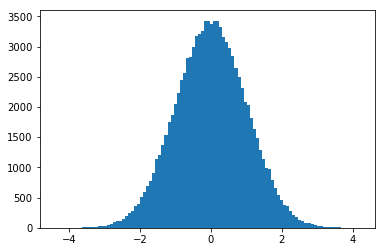

In [71]:
normal_dist = np.random.randn(100000)   # 100000 random samples from N(0, 1) 

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(normal_dist, bins=100)
plt.show()

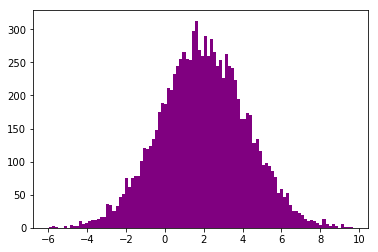

In [72]:
# N(2, 5) 에서 취한 10000 샘플들 ; 

normal_samples = np.sqrt(5) * np.random.randn(10000) + 2
plt.hist(normal_samples, bins=100, color='purple')
plt.show()

If we want to draw a random sample from a non-standard normal distribution, we can simply add a scalar value to the array elements to shift the mean of the sample, and we can multiply the sample by a scalar to change its standard deviation. The following code snippet will change the properties of our random sample as if it has been drawn from a Normal distribution $N(5, 4)$:

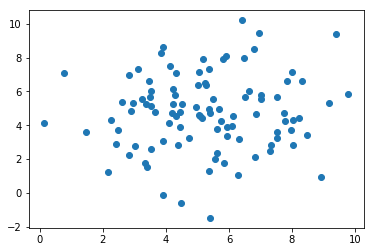

In [73]:
rng3 = np.random.RandomState(seed=123)
scores = 2. * rng3.randn(100, 2) + 5.

plt.scatter(scores[:, 0], scores[:, 1])
#plt.savefig('images/numpy-intro/random_2.png', dpi=600)
plt.show()

Note that in the example above, we multiplied the z-scores by a standard deviation of 2 -- the standard deviation of a sample is the square root of the variance $\sigma^2$. Also, notice that all elements in the array were updated when we multiplied it by a scalar or added a scalar. In the next section, we will discuss NumPy's capabilities regarding such element-wise operations in more detail.

## reshape 함수 : Reshaping Arrays

In practice, we often run into situations where existing arrays do not have the *right* shape to perform certain computations. As you might remember from the beginning of this appendix, the size of NumPy arrays is fixed. Fortunately, this does not mean that we have to create new arrays and copy values from the old array to the new one if we want arrays of different shapes -- the size is fixed, but the shape is not. NumPy provides a `reshape` methods that allow us to obtain a view of an array with a different shape. 

For example, we can reshape a one-dimensional array into a two-dimensional one using `reshape` as follows:

In [74]:
ary1d = np.array([1, 2, 3, 4, 5, 6])
ary2d_view = ary1d.reshape(2, 3)
ary2d_view

array([[1, 2, 3],
       [4, 5, 6]])

In [75]:
ary1d

array([1, 2, 3, 4, 5, 6])

In [76]:
ary2d_view + 2

array([[3, 4, 5],
       [6, 7, 8]])

In [77]:
ary1d

array([1, 2, 3, 4, 5, 6])

While we need to specify the desired elements along each axis, we need to make sure that the reshaped array has the same number of elements as the original one. However, we do not need to specify the number elements in each axis; NumPy is smart enough to figure out how many elements to put along an axis if only one axis is unspecified (by using the placeholder `-1`):

In [78]:
ary1d.reshape(2, -1)

array([[1, 2, 3],
       [4, 5, 6]])

In [79]:
ary1d.reshape(-1, 2)

array([[1, 2],
       [3, 4],
       [5, 6]])

We can, of course, also use `reshape` to flatten an array:

In [80]:
ary2d = np.array([[1, 2, 3],
                  [4, 5, 6]])

ary2d.reshape(-1)

array([1, 2, 3, 4, 5, 6])

In [81]:
ary2d    # 원래 ary2d는 변하지 않았음. 

array([[1, 2, 3],
       [4, 5, 6]])

Note that NumPy also has a shorthand for that called `ravel`:

In [82]:
ary2d.ravel()

array([1, 2, 3, 4, 5, 6])

A function related to `ravel` is `flatten`. In contrast to `ravel`, `flatten` returns a copy, though:

In [83]:
np.may_share_memory(ary2d.flatten(), ary2d)

False

In [84]:
np.may_share_memory(ary2d.ravel(), ary2d)

True

#### Array 합치기
Sometimes, we are interested in merging different arrays. Unfortunately, there is no efficient way to do this without creating a new array, since NumPy arrays have a fixed size. While combining arrays should be avoided if possible -- for reasons of computational efficiency -- it is sometimes necessary. To combine two or more array objects, we can use NumPy's `concatenate` function as shown in the following examples:

In [85]:
ary = np.array([1, 2, 3])   # 여기서의 ary는 벡터 

# stack along the first axis
np.concatenate((ary, ary)) 

array([1, 2, 3, 1, 2, 3])

In [86]:
ary = np.array([[1, 2, 3]])   # 여기서의 ary는 matrix 

# stack along the first axis (here: rows)
np.concatenate((ary, ary), axis=0) 

array([[1, 2, 3],
       [1, 2, 3]])

In [87]:
# stack along the second axis (here: column)
np.concatenate((ary, ary), axis=1) 

array([[1, 2, 3, 1, 2, 3]])

- vstack, hstack 등 더 자세한 [Array manipulation](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html)
- 더 자세한 인덱싱과 np.c_ 같은 것 사용은 [여기로](https://docs.scipy.org/doc/numpy/reference/routines.indexing.html)

## Comparison Operators and Masks

In the previous section, we already briefly introduced the concept of Boolean masks in NumPy. Boolean masks are `bool`-type arrays (storing `True` and `False` values) that have the same shape as a certain target array. For example, consider the following 4-element array below. Using comparison operators (such as `<`, `>`, `<=`, and `>=`), we can create a Boolean mask of that array which consists of `True` and `False` elements depending on whether a condition is met in the target array (here: `ary`):

In [88]:
ary = np.array([1, 2, 3, 4])
mask = ary > 2
mask

array([False, False,  True,  True], dtype=bool)

One we created such a Boolean mask, we can use it to select certain entries from the target array -- those entries that match the condition upon which the mask was created):

In [89]:
ary[mask]

array([3, 4])

Beyond the selection of elements from an array, Boolean masks can also come in handy when we want to count how many elements in an array meet a certain condition:

In [90]:
mask

array([False, False,  True,  True], dtype=bool)

In [91]:
mask.sum()

2

If we are interested in the index positions of array elements that meet a certain condition, we can use the `nonzero()` method on a mask, as follows:

In [92]:
mask.nonzero()

(array([2, 3], dtype=int64),)

Note that selecting index elements in the way suggested above is a two-step process of creating a mask and then applying the non-zero method:

In [93]:
(ary > 2).nonzero()

(array([2, 3], dtype=int64),)

An alternative approach to the index selection by a condition is using the `np.where` method:

In [94]:
np.where(ary > 2)

(array([2, 3], dtype=int64),)

While the example above demonstrate the use of `np.where` with only one input argument provided, `np.where` is especially useful in the context of re-assigning values to array elements that meet a certain condition.

In [95]:
np.where(ary > 2, 1, 0)

array([0, 0, 1, 1])

Notice that we use the `np.where` function with three arguments: `np.where(condition, x, y`), which is interpreted as  
> When condition is True, yield x, otherwise yield y.

Or more concretely, what we have done in the previous example is to assign `1` to all elements greater than 2, and 0 to all other elements. Of course, this can also be achieved by using Boolean masks "manually:"

In [96]:
ary = np.array([1, 2, 3, 4])
mask = ary > 2
ary[mask] = 1
ary[~mask] = 0
ary

array([0, 0, 1, 1])

The `~` operator in the example above is one of the logical operators in NumPy:
    
- And: `&`  or `np.bitwise_and`
- Or: `|` or `np.bitwise_or`
- Xor: `^` or `np.bitwise_xor`
- Not: `~` or `np.bitwise_not`

These logical operators allow us to chain an arbitrary number of conditions to create even more "complex" Boolean masks. For example, using the "Or" operator, we can select all elements that are greater than 3 or smaller than 2 as follows:

In [97]:
ary = np.array([1, 2, 3, 4])

(ary > 3) | (ary < 2)

array([ True, False, False,  True], dtype=bool)

And, for example, to negate the condition, we can use the `~` operator:

In [98]:
~((ary > 3) | (ary < 2))

array([False,  True,  True, False], dtype=bool)

## Linear Algebra with NumPy Arrays

Most of the operations in machine learning and deep learning are based on concepts from linear algebra. In this section, we will take a look how to perform basic linear algebra operations using NumPy arrays.

---

I want to mention that there is also a special [`matrix`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html) type in NumPy. NumPy `matrix` objects are analogous to NumPy arrays but are restricted to two dimensions. Also, matrices define certain operations differently than arrays; for instance, the `*` operator performs matrix multiplication instead of element-wise multiplication. However, NumPy `matrix` is less popular in the science community compared to the more general array data structure. Since we are also going to work with arrays that have more than two dimensions (for example, when we are working with convolutional neural networks), we will not use NumPy matrix data structures in this book.

---

Intuitively, we can think of one-dimensional NumPy arrays as data structures that represent row vectors:

In [99]:
row_vector = np.array([1, 2, 3])
row_vector

array([1, 2, 3])

Similarly, we can use two-dimensional arrays to create column vectors:

In [100]:
column_vector = np.array([[1, 2, 3]]).reshape(-1, 1)
column_vector

array([[1],
       [2],
       [3]])

Instead of reshaping a one-dimensional array into a two-dimensional one, we can simply add a new axis as shown below:

In [101]:
row_vector[:, np.newaxis]

array([[1],
       [2],
       [3]])

Note that in this context, `np.newaxis` behaves like `None`:

In [102]:
row_vector[:, None]

array([[1],
       [2],
       [3]])

All three approaches listed above, using `reshape(-1, 1)`, `np.newaxis`, or `None` yield the same results -- all three approaches create views not copies of the `row_vector` array.

As we remember from the Linear Algebra appendix, we can think of a column vector as a matrix consisting only of one column. To perform matrix multiplication between matrices, we learned that number of columns of the left matrix must match the number of rows of the matrix to the right. In NumPy, we can perform matrix multiplication via the `matmul` function:

In [103]:
matrix = np.array([[1, 2, 3], 
                   [4, 5, 6]])

In [104]:
np.matmul(matrix, column_vector)

array([[14],
       [32]])

![](images/numpy-intro/matmul.png)

However, if we are working with matrices and vectors, NumPy can be quite forgiving if the dimensions of matrices and one-dimensional arrays do not match exactly -- thanks to broadcasting. The following example yields the same result as the matrix-column vector multiplication, except that it returns a one-dimensional array instead of a two-dimensional one:

In [105]:
np.matmul(matrix, row_vector)

array([14, 32])

Similarly, we can compute the dot-product between two vectors (here: the vector norm)

In [106]:
np.matmul(row_vector, row_vector)

14

NumPy has a special `dot` function that behaves similar to `matmul` on pairs of one- or two-dimensional arrays -- its underlying implementation is different though, and one or the other can be slightly faster on specific machines and versions of [BLAS](https://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms):

In [107]:
np.dot(row_vector, row_vector)

14

In [108]:
np.dot(matrix, row_vector)

array([14, 32])

In [109]:
np.dot(matrix, column_vector)

array([[14],
       [32]])

Similar to the examples above we can use `matmul` or `dot` to multiply two matrices (here: two-dimensional arrays). In this context, NumPy arrays have a handy `transpose` method to transpose matrices if necessary:

In [110]:
matrix = np.array([[1, 2, 3], 
                   [4, 5, 6]])

matrix.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

![](images/numpy-intro/transpose.png)

In [111]:
np.dot(matrix, matrix.transpose())

array([[14, 32],
       [32, 77]])

While `transpose` can be annoyingly verbose for implementing linear algebra operations -- think of [PEP8's](https://www.python.org/dev/peps/pep-0008/) *80 character per line* recommendation -- NumPy has a shorthand for that: `T`:

In [112]:
matrix.T

array([[1, 4],
       [2, 5],
       [3, 6]])

![](images/numpy-intro/matmatmul.png)

While this section demonstrates some of the basic linear algebra operations carried out on NumPy arrays that we use in practice, you can find an additional function in the documentation of NumPy's submodule for linear algebra: [`numpy.linalg`](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html). If you want to perform a particular linear algebra routine that is not implemented in NumPy, it is also worth consulting the [`scipy.linalg` documentation](https://docs.scipy.org/doc/scipy/reference/linalg.html) -- SciPy is a library for scientific computing built on top of NumPy.

## Set Operations

Appendix B: Algebra Basics introduced the basics behind set theory, which are visually summarized in the following figure, and NumPy implements several functions that allow us to work with sets efficiently so that we are not restricted to Python's built-in functions (and converting back and forth between Python sets and NumPy arrays).

![](images/numpy-intro/set_theory.png)

Remember that a set is essentially a collection of unique elements. Given an array, we can generate such a "set" using the `np.unique` function:

In [113]:
ary = np.array([1, 1, 2, 3, 1, 5])
ary_set = np.unique(ary)
ary_set

array([1, 2, 3, 5])

However, we have to keep in mind that unlike Python sets, the output of `np.unique` is a regular NumPy array, not specialized data structure that does not allow for duplicate entries. The set operations for example, set union (`np.union1d`), set difference (`np.setdiff1d`), or set intersection (`np.intersect1d`) would return the same results whether array elements are unique or not. However, setting their optional `assume_unique` argument can speed up the computation.

In [114]:
ary1 = np.array([1, 2, 3])
ary2 = np.array([3, 4, 5, 6])        
np.intersect1d(ary1, ary2, assume_unique=True)

array([3])

In [115]:
np.setdiff1d(ary1, ary2, assume_unique=True)

array([1, 2])

In [116]:
np.union1d(ary1, ary2) # does not have assume_unique

array([1, 2, 3, 4, 5, 6])

Note that NumPy does not have a function for the symmetric set difference, but it can be readily computed by composition:

In [117]:
np.union1d(np.setdiff1d(ary1, ary2, 
                        assume_unique=True),
           np.setdiff1d(ary2, ary1,
                        assume_unique=True))

array([1, 2, 4, 5, 6])

For a complete list of set operations in NumPy, please see the official [Set Routines](https://docs.scipy.org/doc/numpy/reference/routines.set.html) documentation.

## Serializing NumPy Arrays : ndarray 저장

In the context of computer science, serialization is a term that refers to storing data or objects in a different format that can be used for reconstruction later. For example, in Python, we can use the pickle library to write Python objects as bytecode (or binary code) to a local drive.

NumPy offers a data storage format ([NPY](https://docs.scipy.org/doc/numpy/neps/npy-format.html)) that is especially well-suited (compared to regular pickle files) for storing array data. There are three different functions that can be used for this purpose:

- `np.save`
- `np.savez`
- `np.savez_compressed`

Starting with `np.save`, this function saves a single array to a so-called `.npy` file:

In [118]:
ary1 = np.array([1, 2, 3])
np.save('ary-data.npy', ary1)
del(ary1)

In [119]:
ary1 = np.load('ary-data.npy')
ary1

array([1, 2, 3])

Suffice it to say, the the `np.load` a universal function for loading data that has been serialized via NumPy back into the current Python session.

The `np.savez` is slightly more powerful than the `np.save` function as it generates an archive consisting of 1 or more `.npy` files and thus allows us to save multiple arrays at once.

In [120]:
np.savez('ary-data.npz', ary1, ary2)

However, note that if the `np.load` function will wrap the arrays as a `NpzFile` object from which the individual arrays can be accessed via keys like values in a Python dictionary:

In [121]:
d = np.load('ary-data.npz')
d.keys()

['arr_0', 'arr_1']

In [122]:
d['arr_0']

array([1, 2, 3])

As demonstrated above, the arrays are numerated in ascending order with an `arr_` prefix (`'arr_0'`, `'arr_1'`, etc.). To use a custom naming convention, we can simply provide keyword arguments:

In [123]:
kwargs = {'ary1':ary1, 'ary2':ary2}

np.savez('ary-data.npz',
         **kwargs)

In [124]:
np.load('ary-data.npz')
d = np.load('ary-data.npz')
d['ary1']

array([1, 2, 3])

## Conclusion

We have covered a lot of material in this appendix. If you are new to NumPy, its functionality can be quite overwhelming at first. Good news is that we do not need to master all the different concepts at once before we can get started using NumPy in our applications. In my opinion, the most useful yet most difficult concepts are NumPy's broadcasting rules and to distinguish between views and copies of arrays. However, with some experimentation, you can quickly get the hang of it and be able to write elegant and efficient NumPy code. 